In [33]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## SVM MODEL

In [2]:
df_cervical = pd.read_csv('sobar-72.csv')
df_cervical.shape

(72, 20)

In [3]:
df_cervical.head(10)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
5,10,14,8,6,15,8,10,1,3,4,2,14,8,7,2,7,13,9,6,1
6,10,15,4,6,14,6,10,5,3,7,2,7,13,3,3,15,3,3,5,1
7,8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12,1
8,10,15,7,2,15,6,10,1,3,5,2,9,15,13,10,15,13,15,15,1
9,7,15,7,6,11,8,8,5,3,3,4,15,3,8,2,9,3,4,4,1


### Exploration

In [4]:
print(df_cervical.isna().sum())
print(df_cervical.info())

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHy

In [5]:
#There's no missing value in this dataset

In [6]:
print(df_cervical.describe())

       behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
count            72.000000        72.000000                72.000000   
mean              9.666667        12.791667                11.083333   
std               1.186782         2.361293                 3.033847   
min               2.000000         3.000000                 3.000000   
25%              10.000000        11.000000                 9.000000   
50%              10.000000        13.000000                11.000000   
75%              10.000000        15.000000                14.000000   
max              10.000000        15.000000                15.000000   

       intention_aggregation  intention_commitment  attitude_consistency  \
count              72.000000             72.000000             72.000000   
mean                7.902778             13.347222              7.180556   
std                 2.738148              2.374511              1.522844   
min                 2.000000              6.000

In [7]:
features = df_cervical.columns

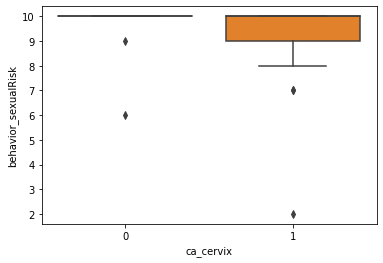

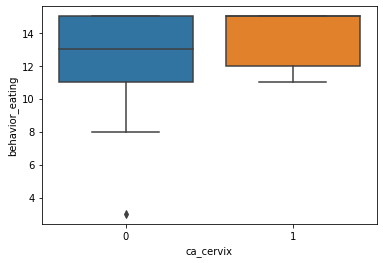

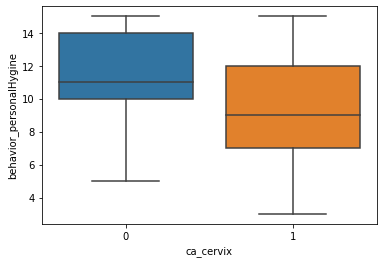

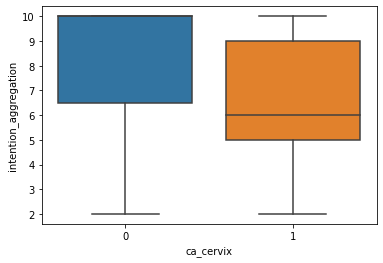

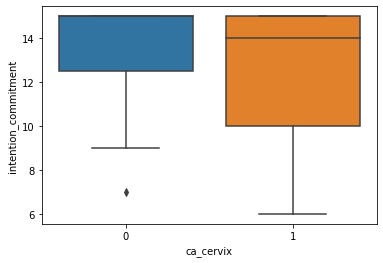

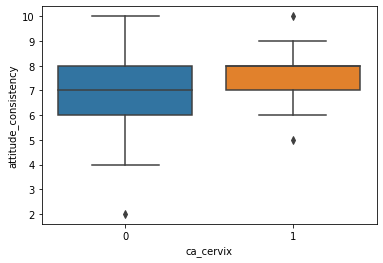

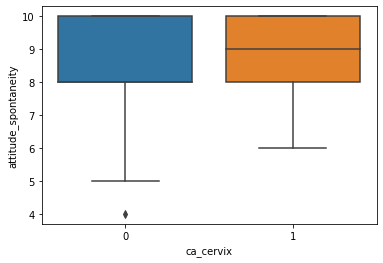

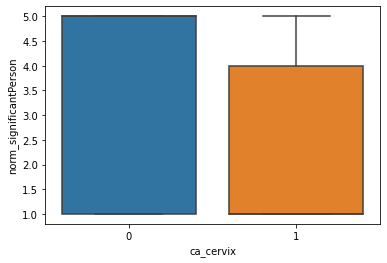

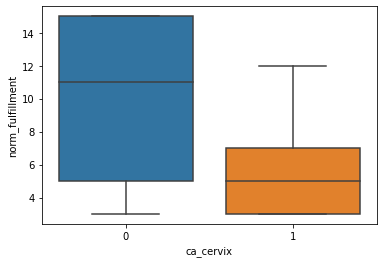

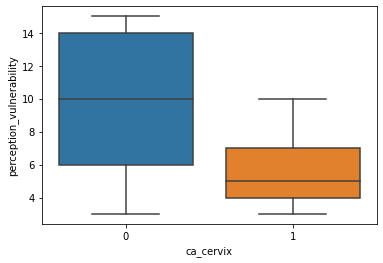

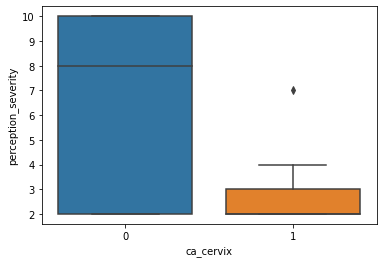

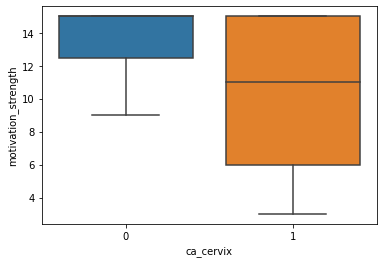

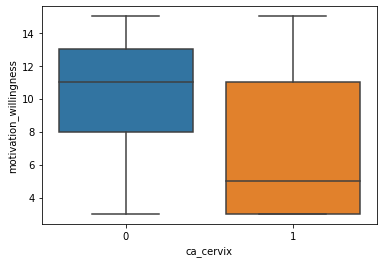

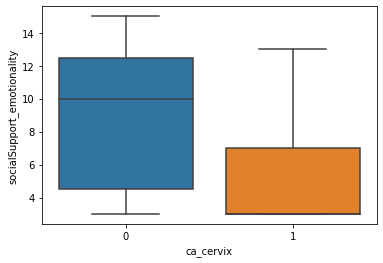

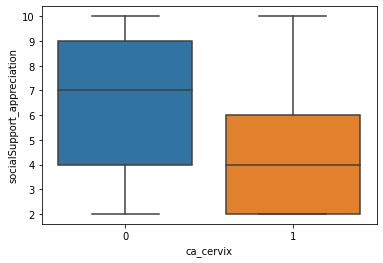

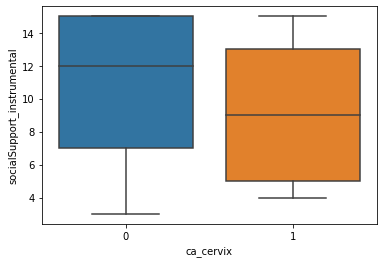

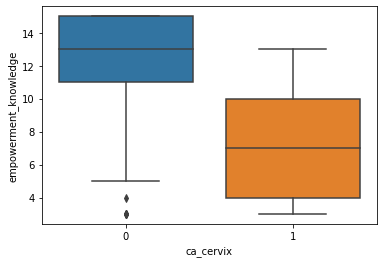

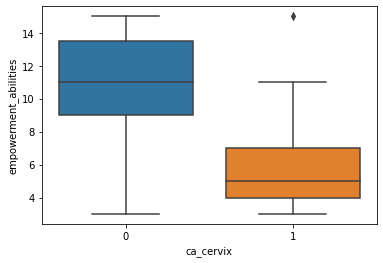

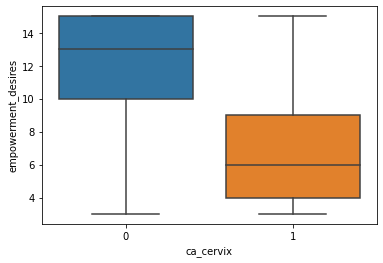

In [8]:
for i in features:
    if (i != 'ca_cervix'):
        sns.boxplot(x=df_cervical.loc[:,'ca_cervix'], y=df_cervical.loc[:,i])
        plt.ylabel(str(i))
        plt.show()

### Extracting Features 

In [9]:
scl = MinMaxScaler()
x_scale = scl.fit_transform(df_cervical.loc[:, 'behavior_sexualRisk':'empowerment_desires'].values)

In [10]:
x = df_cervical.loc[:, 'behavior_sexualRisk':'empowerment_desires'].values
y = df_cervical.loc[:, ['ca_cervix']].values

In [16]:
#split train test set to 20:80
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, 
                                                                   test_size = 0.20, random_state=42)

#split train test set to 20:80
x_train_scale, x_test_scale, y_train_scale, y_test_scale = model_selection.train_test_split(x_scale,y, 
                                                                   test_size = 0.20, random_state=42)

### Manually Training Model

In [17]:
def svm_model(k, c, x, y):
    model = svm.SVC(kernel=k, C=c).fit(x, y)
    return model
    

In [18]:
model_1_linear = svm_model('linear', 1, x_train, y_train.ravel())
model_2_poly = svm_model('poly', 1, x_train, y_train.ravel())
model_3_rbf = svm_model('rbf', 1, x_train, y_train.ravel())
model_4_sigmoid = svm_model('sigmoid', 1, x_train, y_train.ravel())

model_1_linear_scale = svm_model('linear', 3, x_train_scale, y_train_scale.ravel())
model_2_poly_scale = svm_model('poly', 1, x_train_scale, y_train_scale.ravel())
model_3_rbf_scale = svm_model('rbf', 1, x_train_scale, y_train_scale.ravel())
model_4_sigmoid_scale = svm_model('sigmoid', 1, x_train_scale, y_train_scale.ravel())

In [19]:
print(str('Linear Model Score : ') + str(model_1_linear.score(x_test, y_test)))
print(str('Poly Model Score : ') + str(model_2_poly.score(x_test, y_test)))
print(str('RBF Model Score : ') + str(model_3_rbf.score(x_test, y_test)))
print(str('Sigmoid Model Score : ') + str(model_4_sigmoid.score(x_test, y_test)))


Linear Model Score : 0.9333333333333333
Poly Model Score : 0.9333333333333333
RBF Model Score : 0.9333333333333333
Sigmoid Model Score : 0.5333333333333333


In [20]:
print(str('Linear Model Score Scale : ') + str(model_1_linear_scale.score(x_test_scale, y_test_scale)))
print(str('Poly Model Score Scale : ') + str(model_2_poly_scale.score(x_test_scale, y_test_scale)))
print(str('RBF Model Score Scale : ') + str(model_3_rbf_scale.score(x_test_scale, y_test_scale)))
print(str('Sigmoid Model Score Scale : ') + str(model_4_sigmoid_scale.score(x_test_scale, y_test_scale)))

Linear Model Score Scale : 0.9333333333333333
Poly Model Score Scale : 1.0
RBF Model Score Scale : 0.9333333333333333
Sigmoid Model Score Scale : 0.5333333333333333


### Hyper Parameter Tuning

In [21]:
#testing different parameters to see which can create the best model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [22]:
param_grid = {'C':[0.1,1,50], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(x_train, y_train.ravel())

grid_scale = GridSearchCV(SVC(), param_grid)
grid_scale.fit(x_train_scale, y_train_scale.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 50],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [23]:
print("Non-Scale")
print(grid.best_params_)
print(grid.score(x_test, y_test))

print("Scale")
print(grid_scale.best_params_)
print(grid_scale.score(x_test_scale, y_test_scale))

Non-Scale
{'C': 0.1, 'kernel': 'linear'}
1.0
Scale
{'C': 50, 'kernel': 'linear'}
1.0


### Train svm model with best possible parameter

In [24]:
model_1_linear = svm_model('linear', 0.1, x_train, y_train.ravel())

In [25]:
model_1_linear_scale = svm_model('linear', 50, x_train_scale, y_train_scale.ravel())

### K-Folds Cross Validation

In [26]:
#give cross_val_score a model, the entire dataset and its real values and the number of folds:
#non-scale
print('Non-Scale')
scores_res = model_selection.cross_val_score(model_1_linear, x, y.ravel(), cv=5)
print(scores_res)
print(scores_res.mean())


Non-Scale
[0.86666667 0.66666667 1.         0.85714286 0.92857143]
0.8638095238095238


In [27]:
#Scale Data
print('Scale')
scores_res = model_selection.cross_val_score(model_1_linear_scale, x, y.ravel(), cv=5)
print(scores_res)
print(scores_res.mean())

Scale
[0.8        0.66666667 0.92857143 0.78571429 0.92857143]
0.821904761904762


### Prediction

In [28]:
model_linear_pred = model_1_linear.predict(x_test)
df_result = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': model_linear_pred})
df_result[1:20]

,Actual,Predicted
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0
10,0,0


In [29]:

#creating confusion matrix
cm = confusion_matrix(y_test, model_linear_pred)
cm

array([[8, 0],
       [0, 7]])

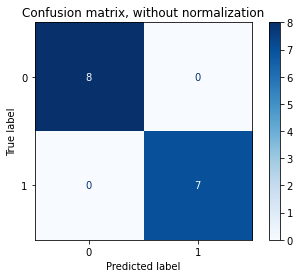

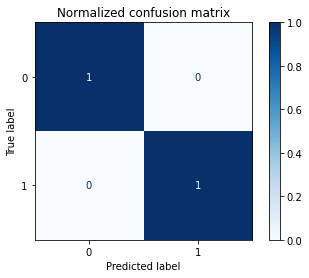

In [30]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names = [0,1]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_1_linear, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

## k-Means Cluster

In [82]:
from sklearn.cluster import KMeans

In [83]:
df_heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df_heart.head(50)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [84]:
print(df_heart.isna().sum())
print(df_heart.describe())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000

In [85]:
bool_features = df_heart[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
con_features = df_heart[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets'
                       ,'serum_creatinine', 'serum_sodium', 'time']]

In [86]:
res = bool_features.groupby(['DEATH_EVENT']).sum()
res = res.reset_index()
res

,DEATH_EVENT,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,83,85,66,132,66
1,1,46,40,39,62,30


In [87]:
#No cleaning nessessary there's no missing data

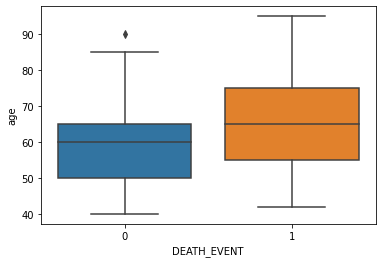

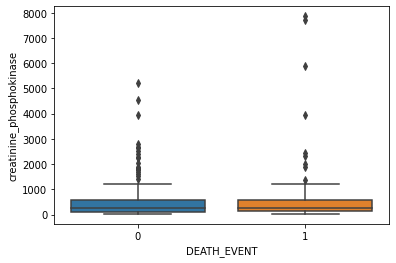

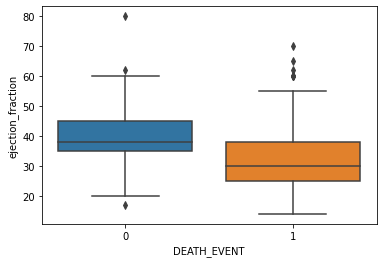

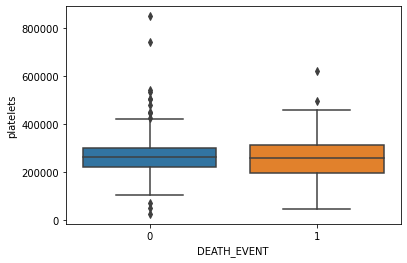

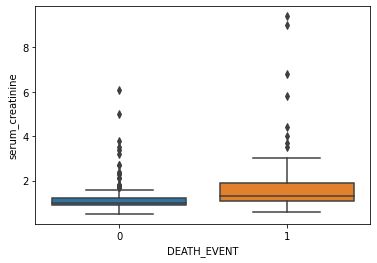

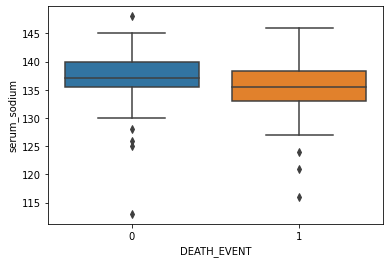

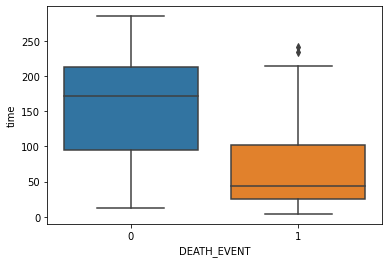

In [88]:
for i in con_features:
    sns.boxplot(x=df_heart.loc[:,'DEATH_EVENT'], y=df_heart.loc[:,i])
    plt.ylabel(str(i))
    plt.show()

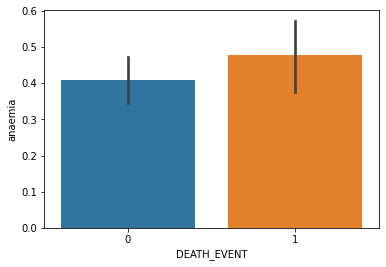

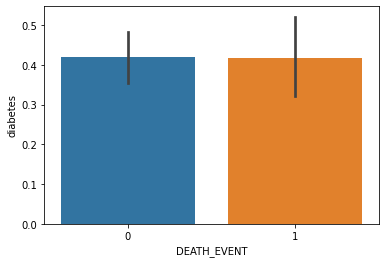

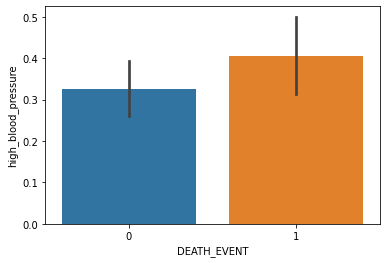

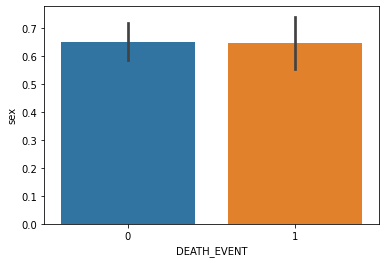

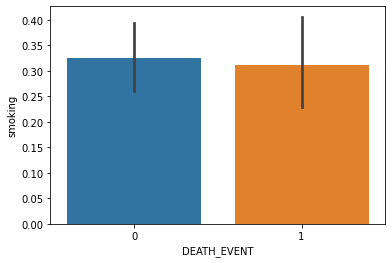

In [89]:
for i in bool_features:
    if (i != 'DEATH_EVENT'):
        sns.barplot(x=df_heart.loc[:,'DEATH_EVENT'], y=df_heart.loc[:,i])
        plt.ylabel(str(i))
        plt.show()


In [90]:
scl = MinMaxScaler()
df_heart_scale = df_heart.copy()
df_heart_scale[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets'
                       ,'serum_creatinine', 'serum_sodium', 'time']] = scl.fit_transform(df_heart_scale[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets'
                       ,'serum_creatinine', 'serum_sodium', 'time']])


In [91]:
df_heart_scale.head(30)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1
5,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,1,1,0.014235,1
6,0.636364,1,0.028451,0,0.015152,0,0.123530,0.078652,0.685714,1,0,0.021352,1
7,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,1,1,0.021352,1
8,0.454545,0,0.017096,0,0.772727,0,0.288833,0.112360,0.714286,0,0,0.021352,1
9,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,1,1,0.021352,1


In [110]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

### K-Means for Non-Scale data and Scale Date

In [93]:
outliers = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']
for i in outliers:
    lower_limit= df_heart[i].quantile(0.25)
    Upper_limit= df_heart[i].quantile(0.75)
    df_heart=df_heart.assign(Value=df_heart[i].where(df_heart[i].between(lower_limit,Upper_limit))).dropna()
df_heart['creatinine_phosphokinase'].max()

582

In [94]:
km = KMeans(n_clusters = 4, random_state=42)
df_heart['cluster'] = km.fit_predict(df_heart)

In [95]:
df_heart.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Value,cluster
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1,1.50,1
13,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11,1,1.10,1
18,70.0,1,125,0,25,1,237000.00,1.00,140,0,0,15,1,1.00,3
21,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20,1,1.60,2
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1,1.30,2
33,50.0,1,159,1,30,0,302000.00,1.20,138,0,0,29,0,1.20,2
43,72.0,0,127,1,50,1,218000.00,1.00,134,1,0,33,0,1.00,0
59,72.0,0,364,1,20,1,254000.00,1.30,136,1,1,59,1,1.30,3
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0,1.18,1
68,70.0,0,161,0,25,0,244000.00,1.20,142,0,0,66,1,1.20,3


In [96]:
df_heart['cluster'].value_counts()

1    20
3    10
0     7
2     6
Name: cluster, dtype: int64

In [97]:
km_scale = KMeans(n_clusters = 4, random_state=42)
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df_heart_scale)
label = km_scale.fit_predict(df_heart_scale)
df_heart_scale['cluster'] = label
df_heart_scale.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1,3
5,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,1,1,0.014235,1,1
6,0.636364,1,0.028451,0,0.015152,0,0.123530,0.078652,0.685714,1,0,0.021352,1,1
7,0.363636,1,0.037254,1,0.696970,0,0.519942,0.067416,0.514286,1,1,0.021352,1,1
8,0.454545,0,0.017096,0,0.772727,0,0.288833,0.112360,0.714286,0,0,0.021352,1,0
9,0.727273,1,0.012758,0,0.318182,1,0.439932,1.000000,0.571429,1,1,0.021352,1,1


In [98]:
df_heart_scale['cluster'].value_counts()

2    86
3    79
0    69
1    65
Name: cluster, dtype: int64

### Parameter tuning Elbow Method

In [99]:
dist_df = []
dist_df_scale = []
for n_clusters in range(1,15):
    
    km = KMeans(n_clusters = n_clusters)
    km_scale = KMeans(n_clusters = n_clusters)
    
    km.fit(df_heart)
    km_scale.fit(df_heart_scale)
    
    dist_df.append([n_clusters, km.inertia_])
    dist_df_scale.append([n_clusters, km_scale.inertia_])
    
dist_df = pd.DataFrame(dist_df, columns=['n_clusters', 'distance from centroid'])
dist_df_scale = pd.DataFrame(dist_df_scale, columns=['n_clusters', 'distance from centroid'])


In [100]:
dist_df.head()

,n_clusters,distance from centroid
0,1,2.241606e+10
1,2,8.067167e+09
2,3,2.868092e+09
3,4,1.126820e+09
4,5,5.705860e+08


In [101]:
dist_df_scale.head()

,n_clusters,distance from centroid
0,1,845.044134
1,2,516.798799
2,3,397.333499
3,4,312.204432
4,5,291.647031


Text(0.5, 1.0, 'K-Means Elbow Non-Scale Data')

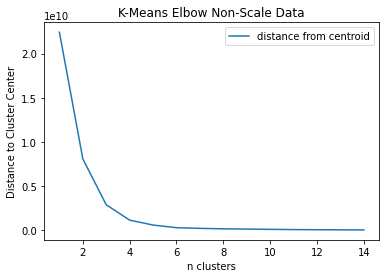

In [102]:
dist_df.set_index('n_clusters').plot()
plt.xlabel('n clusters')
plt.ylabel('Distance to Cluster Center')
plt.title('K-Means Elbow Non-Scale Data')

Text(0.5, 1.0, 'K-Means Elbow Scale Data')

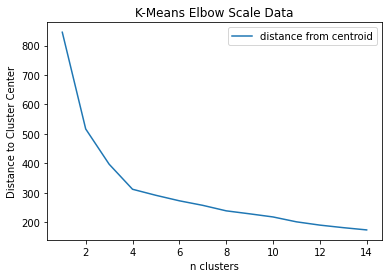

In [103]:
dist_df_scale.set_index('n_clusters').plot()
plt.xlabel('n clusters')
plt.ylabel('Distance to Cluster Center')
plt.title('K-Means Elbow Scale Data')

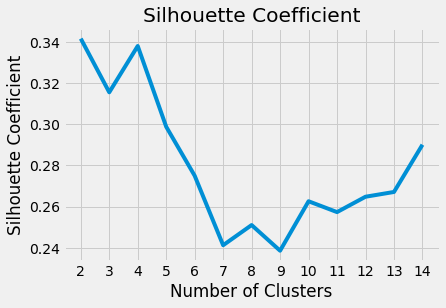

In [108]:
 kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

silhouette_coefficients = []

for k in range(2,15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_heart_scale)
    score = silhouette_score(df_heart_scale, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Coefficient')
plt.show()

In [114]:
kmeans = KMeans(n_clusters = 4)
dbscan = DBSCAN(eps=0.5)

kmeans.fit(df_heart_scale)
dbscan.fit(df_heart_scale)

kmeans_silhouette = silhouette_score(
df_heart_scale, kmeans.labels_
).round(2)

dbscan_silhouette = silhouette_score(
df_heart_scale, kmeans.labels_
).round(2)

In [115]:
print('kmeans_silhouette: ' + str(kmeans_silhouette))
print('dbscan_silhouette: ' + str(dbscan_silhouette))

kmeans_silhouette: 0.34
dbscan_silhouette: 0.34


In [74]:
#K-Means is sensitive to outliers so scaling is needed the scale data gives us a more precise n_clusters based on the elbow method

2021-03-31 16:11:22,758 [1610] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)

2021-03-31 16:11:22,776 [1610] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)

2021-03-31 16:11:22,986 [1610] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)

2021-03-31 16:11:23,004 [1610] WARNING  py.warnings:110: [JupyterRequire] /Users/vathanahim/opt/anaconda3/envs/MSIA/lib/python3.7/site-packages/seab

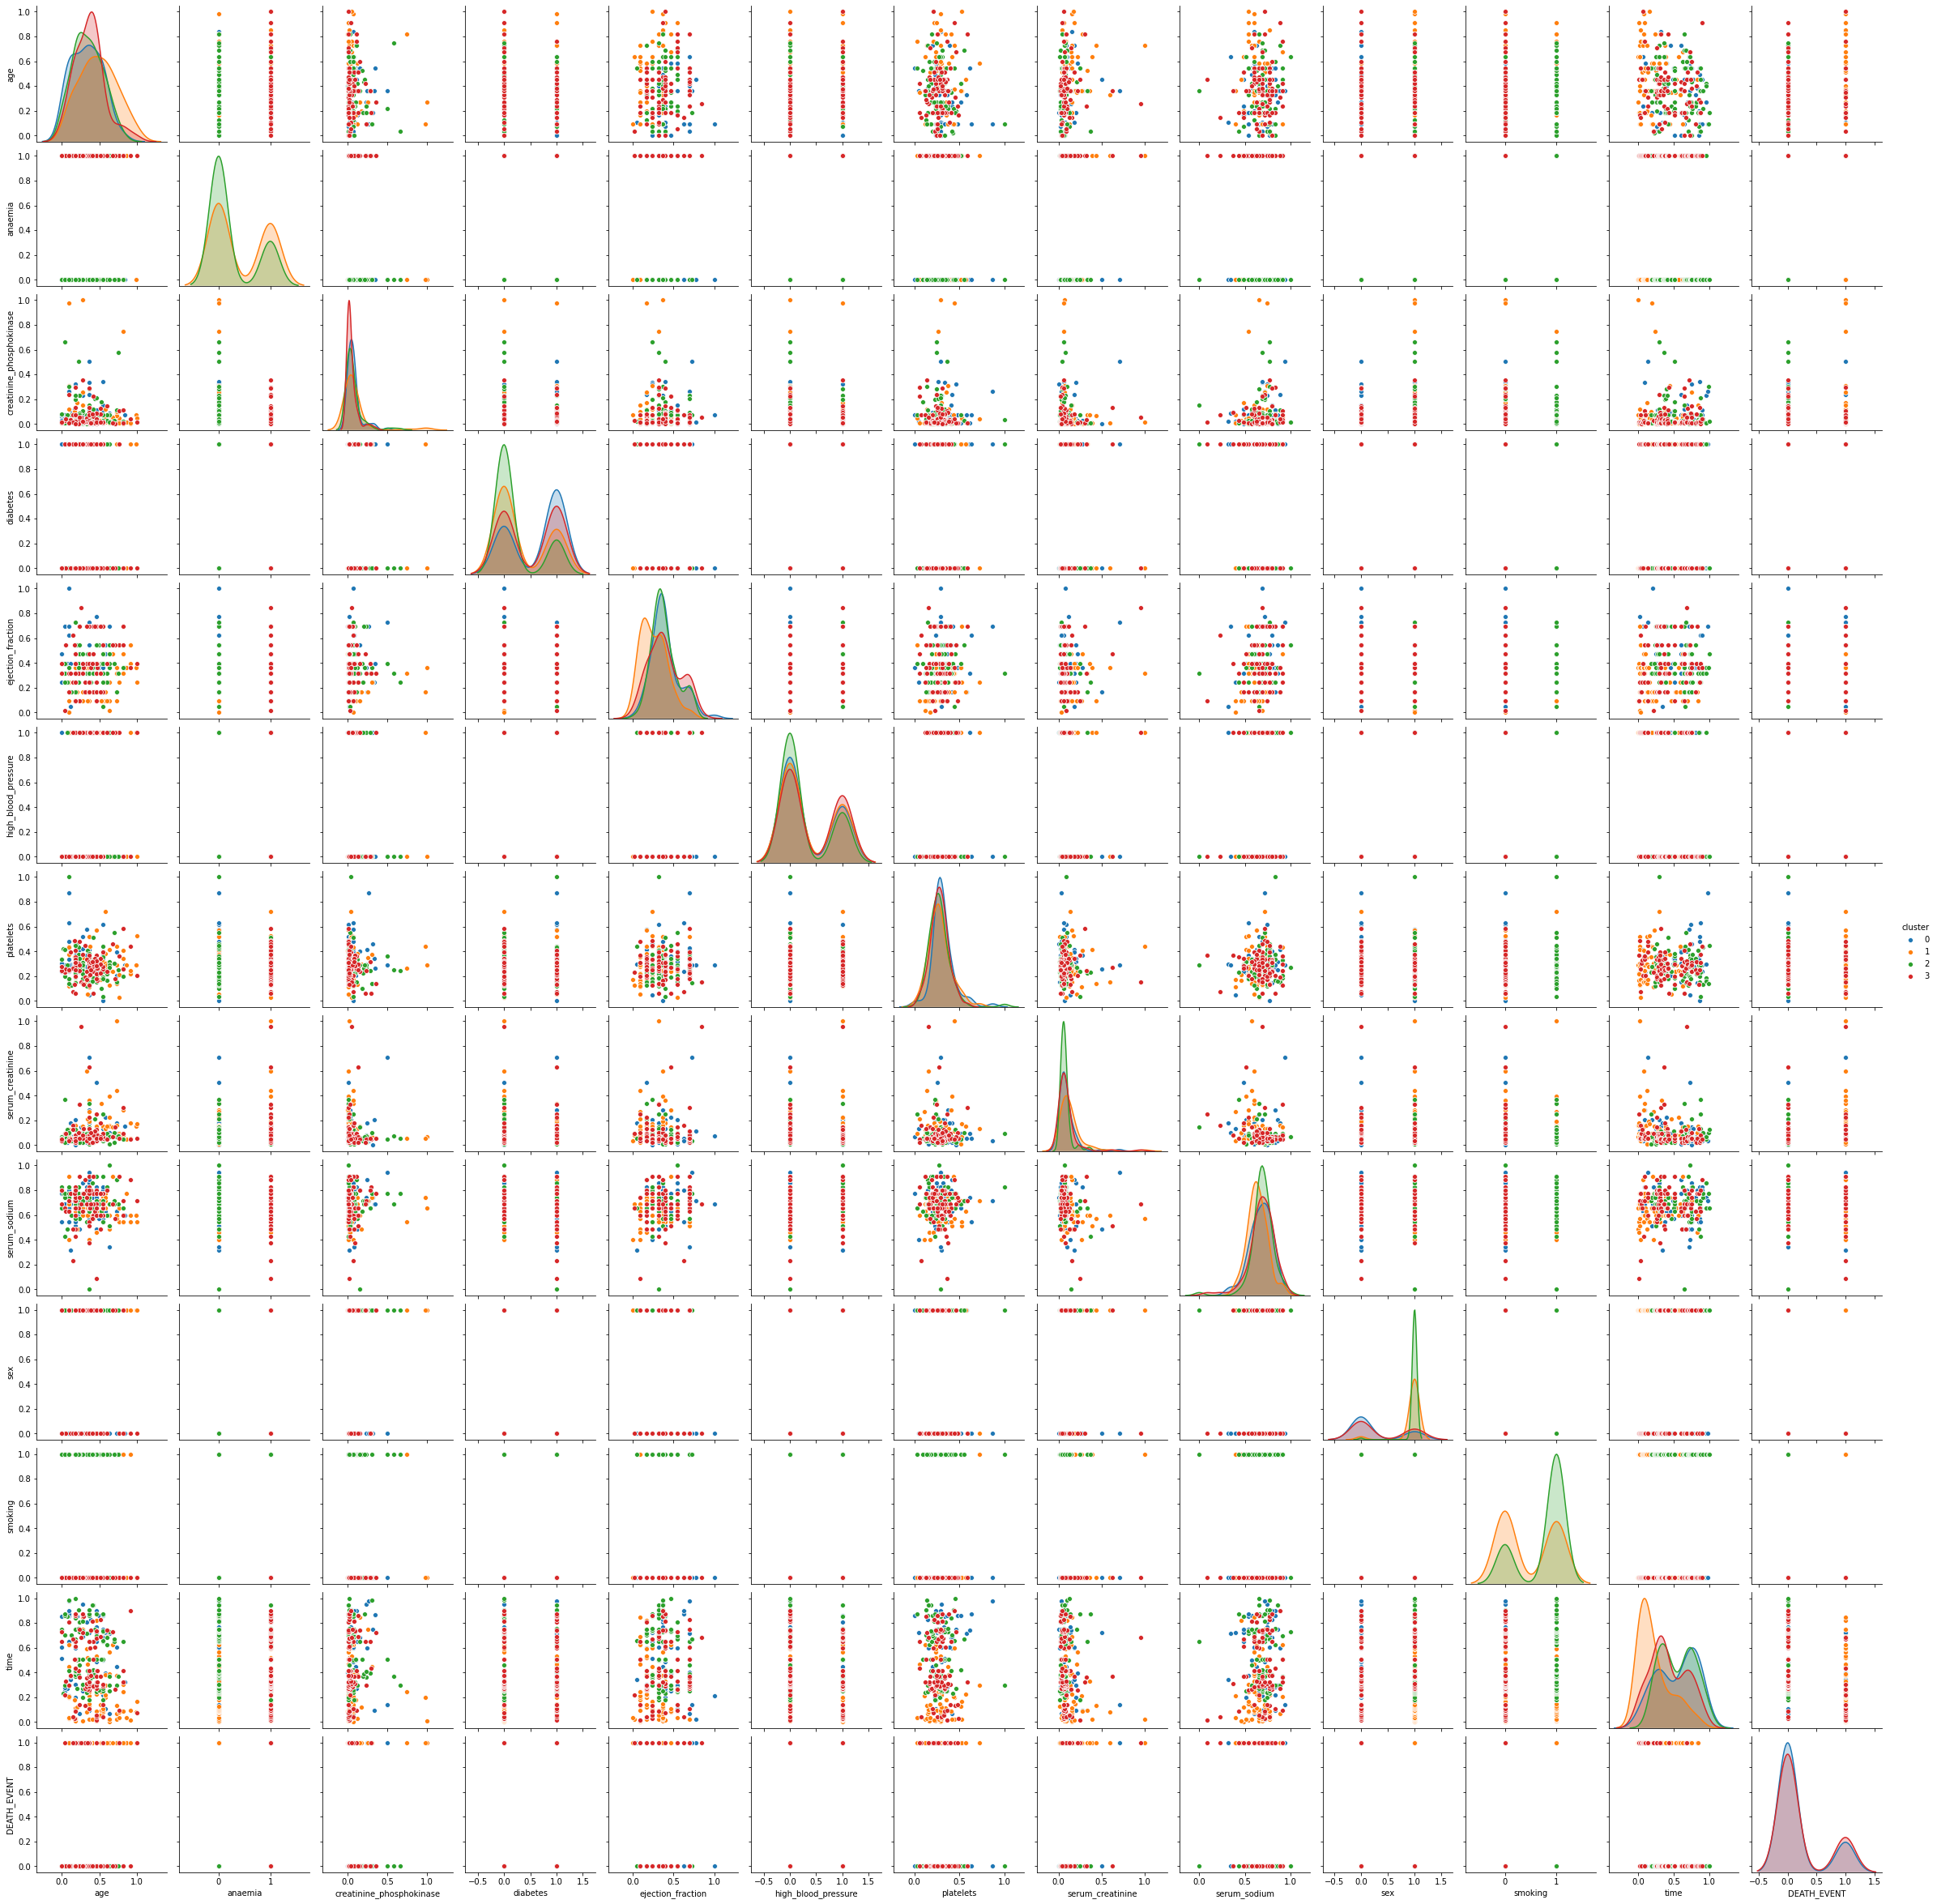

In [75]:
sns.pairplot(df_heart_scale,hue='cluster')

In [76]:
df_heart_scale['Constant'] = "Data"

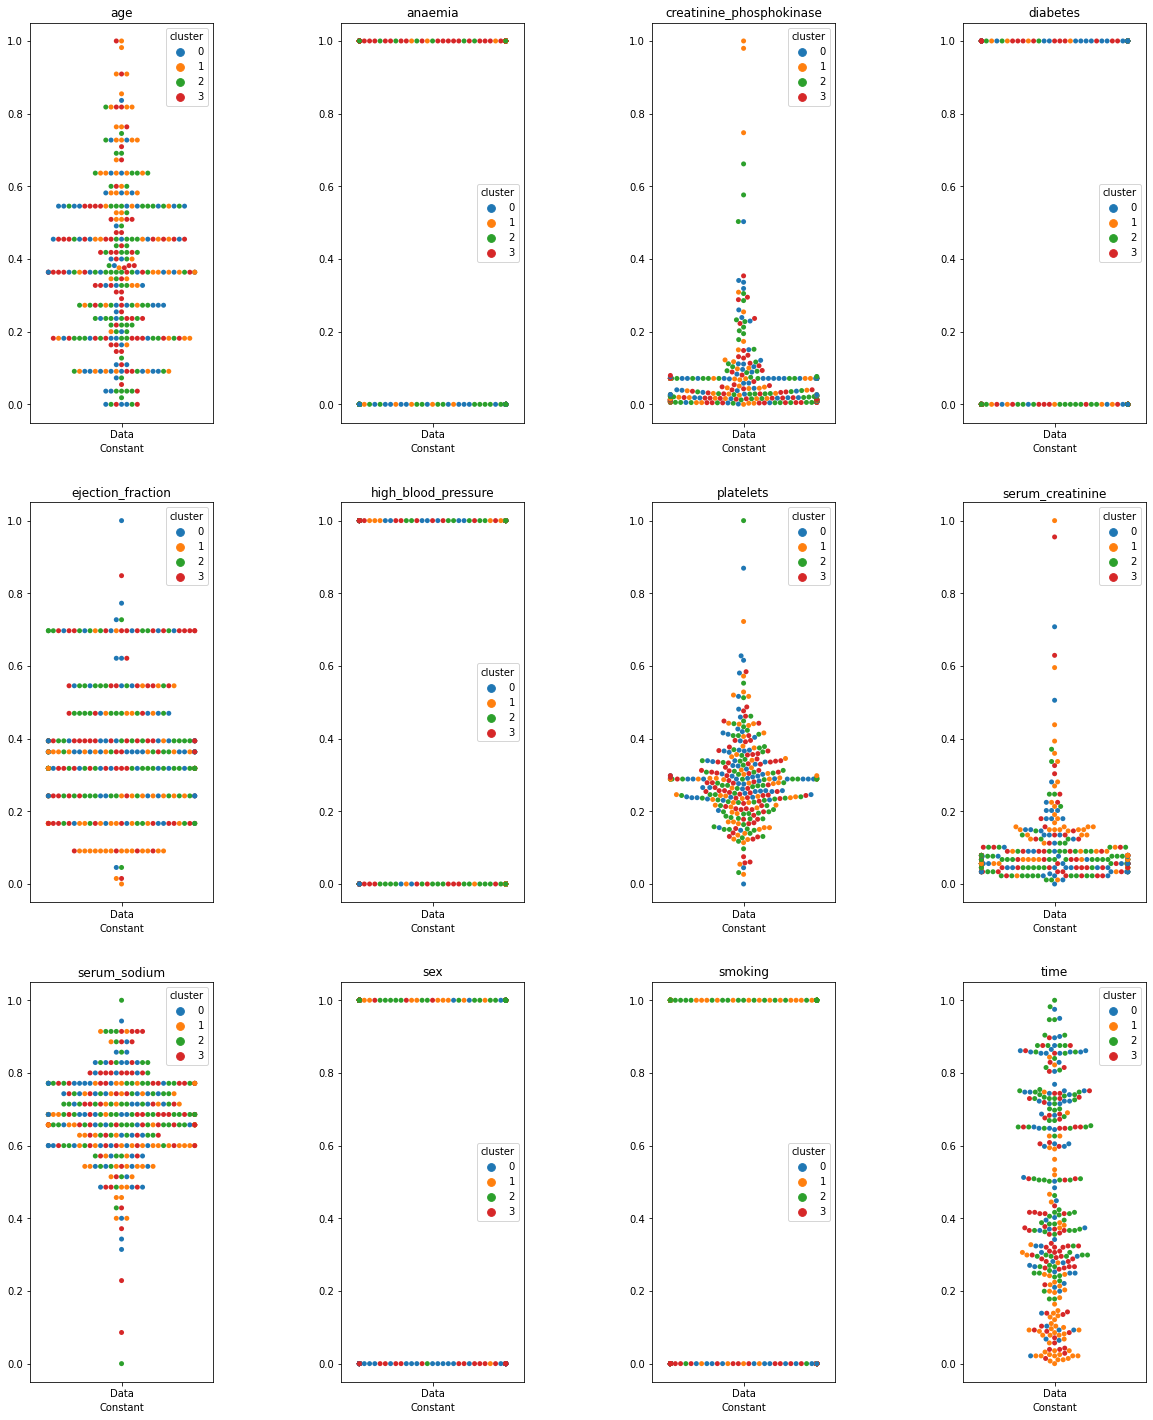

In [77]:
f, axes = plt.subplots(3, 4, figsize=(20, 25), sharex=False) #create a 4x5 grid of empty figures where we will plot our feature plots. We will have a couple empty ones.
f.subplots_adjust(hspace=0.2, wspace=0.7) #Scooch em apart, give em some room
#In this for loop, I step through every column that I want to plot. This is a 4x5 grid, so I split this up by rows of 5 in the else if statements
for i in range(0,len(list(df_heart_scale))-3): 
    col = df_heart_scale.columns[i]
    if i < 4:
        ax = sns.swarmplot(x=df_heart_scale['Constant'],y=df_heart_scale[col].values,hue=df_heart_scale['cluster'],ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 4 and i<8:
        ax = sns.swarmplot(x=df_heart_scale['Constant'],y=df_heart_scale[col].values,hue=df_heart_scale['cluster'],ax=axes[1,(i-4)]) #so if i=6 it is row 1 column 1
        ax.set_title(col)
    elif i >= 8 and i<12:
        ax = sns.swarmplot(x=df_heart_scale['Constant'],y=df_heart_scale[col].values,hue=df_heart_scale['cluster'],ax=axes[2,(i-12)])
        ax.set_title(col)
   